In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world map
world = gpd.read_file("/Users/aamnasoniwala/Desktop/ne_110m_admin_0_countries (1)/ne_110m_admin_0_countries.shp")

# Check column names
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


/var/folders/k7/_r7nqc9s78jfx1ftfzjxmfwc0000gn/T/ipykernel_93707/2673360238.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  world["Diabetes Precision Medicine Research Output"].fillna(0, inplace=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


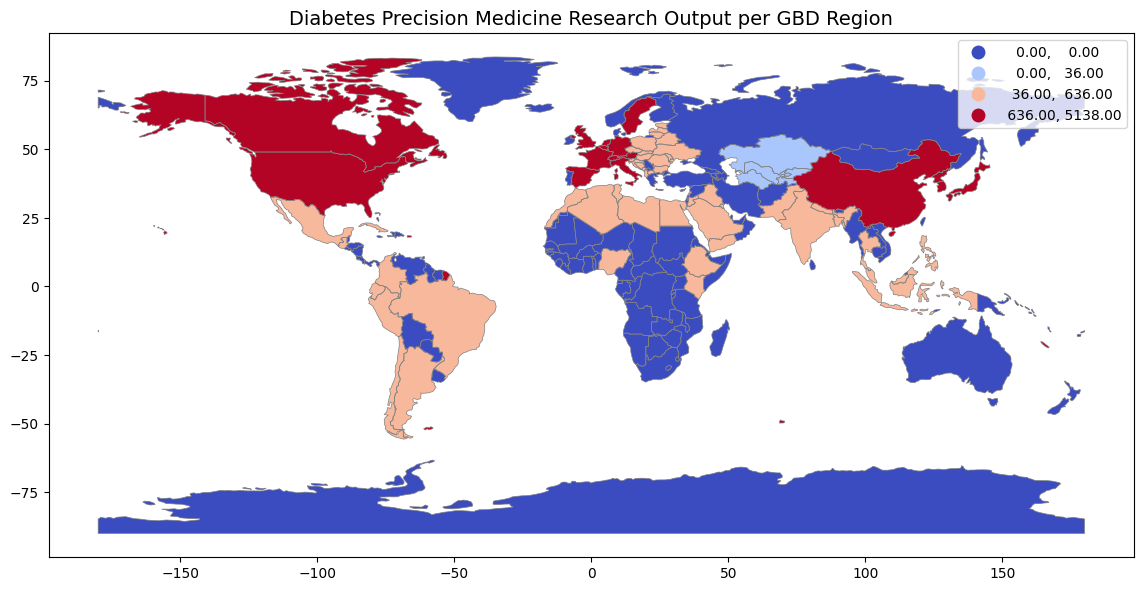

In [21]:
# Research output data
data = {
    "GBD Region": ["Central Asia", "Central and Eastern Europe", "East Asia", "Latin America & Caribbean", "Middle East & North Africa", "South East Asia & Pacific Islands", "South Asia", "Sub Saharan Africa", "North America", "Western Europe"],
    "Diabetes Precision Medicine Research Output": [36, 636, 2178, 210, 507, 142, 253, 156, 5138, 3177]
}
df = pd.DataFrame(data)

# Mapping GBD regions to countries
gbd_to_countries = {
    "Central Asia": ["Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan", "Uzbekistan"],
    "Central and Eastern Europe": ["Albania", "Belarus", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Czechia", "Estonia", "Latvia", "Lithuania", "Hungary", "Moldova", "Montenegro", "North Macedonia", "Poland", "Romania", "Russian Federation", "Serbia", "Slovakia", "Slovenia", "Ukraine"],
    "East Asia": ["China", "Japan", "North Korea", "South Korea", "Taiwan*"],
    "Latin America & Caribbean": ["Brazil", "Mexico", "Argentina", "Colombia", "Peru", "Venezuela, Bolivarian Republic of", "Chile", "Ecuador", "Guatemala", "Cuba"],
    "Middle East & North Africa": ["Algeria", "Egypt", "Iran, Islamic Republic of", "Iraq", "Jordan", "Kuwait", "Lebanon", "Libya", "Morocco", "Saudi Arabia", "Syrian Arab Republic", "Tunisia", "Türkiye", "United Arab Emirates*", "Yemen"],
    "South East Asia & Pacific Islands": ["Indonesia", "Malaysia", "Philippines", "Thailand", "Viet Nam", "Myanmar*"],
    "South Asia": ["Bangladesh", "Bhutan*", "India", "Nepal", "Pakistan"],
    "Sub Saharan Africa": ["Nigeria", "Ethiopia", "South Africa*", "Kenya", "Ghana*", "Tanzania, United Republic of", "Uganda*"],
    "North America": ["Canada", "United States of America"],
    "Western Europe": ["France", "Germany", "Italy", "Spain", "United Kingdom", "Netherlands", "Belgium", "Sweden", "Switzerland", "Austria"]
}

# Countries data 
country_output = []
for region, output in zip(df["GBD Region"], df["Diabetes Precision Medicine Research Output"]):
    for country in gbd_to_countries.get(region, []):
        country_output.append({"country": country, "Diabetes Precision Medicine Research Output": output})

df_countries = pd.DataFrame(country_output)

# Merge with world map data
world = world.merge(df_countries, left_on="SOVEREIGNT", right_on="country", how="left")

# Fill missing values with 0
world["Diabetes Precision Medicine Research Output"].fillna(0, inplace=True)

# Plot the world map with research output
fig, ax = plt.subplots(figsize=(14, 7))
world.boundary.plot(ax=ax, linewidth=0.5, color="gray")
world.plot(column="Diabetes Precision Medicine Research Output", 
           ax=ax, cmap="coolwarm", legend=True, scheme="quantiles",
           missing_kwds={"color": "lightgrey"})
plt.title("Diabetes Precision Medicine Research Output per GBD Region", fontsize=14)
plt.show()
